## Back Test Results Binary Classification

In [1]:
import pandas as pd
from datetime import datetime, timezone
from pycaret.datasets import get_data
from pycaret.classification import *
import yaml
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    pair = cfg['currency']['pair']
    frac = cfg['model']['frac']
    random_state = cfg['model']['random_state']

In [3]:
print('Pair:', pair)
print('Fraction:', frac)
print('Random State:', random_state)

Pair: USDCAD
Fraction: 0.7
Random State: 705


In [4]:
now = datetime.now()
today = now.strftime("%d-%m-%Y_%I-%M_%p")

In [5]:
dataset = pd.read_csv('01_Back_Test_Data.csv')
dataset.shape

(4000, 11)

In [6]:
dataset.head()

,Candle_No,Current_Market_Fit,Current_Market,Rec1_Score,Rec1_Prediction,Rec2_Score,Rec2_Prediction,Rec3_Score,Rec3_Prediction,Rec4_Score,Rec4_Prediction
0,677.0,56.0,Bearish,59.347615,BUY,14.673501,BUY,68.855327,BUY,8.181851,SELL
1,1589.0,48.0,Bullish,53.255630,BUY,82.369182,SELL,1.745419,SELL,0.687798,SELL
2,2465.0,15.0,Bearish,0.647762,BUY,94.645844,BUY,42.454650,BUY,3.935317,BUY
3,3237.0,16.0,Bearish,0.086803,SELL,80.864983,SELL,39.405688,BUY,8.998233,SELL
4,799.0,65.0,Bearish,23.778919,SELL,58.384754,BUY,26.972501,BUY,0.261943,BUY


## Drop Predictions with Less than 20% LR Fit

In [7]:
dataset = dataset[dataset['Current_Market_Fit'] > 20]
dataset = dataset.reset_index()
del dataset['index']

In [8]:
dataset.shape

(2840, 11)

## One-Hot Encoding

In [9]:
dataset['Current_Market'] = dataset['Current_Market'].replace(['Bullish','Bearish'],[1,0])
dataset['Rec1_Prediction'] = dataset['Rec1_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec2_Prediction'] = dataset['Rec2_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec3_Prediction'] = dataset['Rec3_Prediction'].replace(['BUY','SELL'],[1,-1])
dataset['Rec4_Prediction'] = dataset['Rec4_Prediction'].replace(['BUY','SELL'],[1,-1])

In [10]:
dataset['Rec1_Score'] = dataset['Rec1_Score'] * dataset['Rec1_Prediction']
dataset['Rec2_Score'] = dataset['Rec2_Score'] * dataset['Rec2_Prediction']
dataset['Rec3_Score'] = dataset['Rec3_Score'] * dataset['Rec3_Prediction']
dataset['Rec4_Score'] = dataset['Rec4_Score'] * dataset['Rec4_Prediction']

In [11]:
dataset['Rec1_Score'] = dataset['Rec1_Score'].round(2)
dataset['Rec2_Score'] = dataset['Rec2_Score'].round(2)
dataset['Rec3_Score'] = dataset['Rec3_Score'].round(2)
dataset['Rec4_Score'] = dataset['Rec4_Score'].round(2)

In [12]:
dataset = dataset.drop([
    'Candle_No',
    'Current_Market_Fit',
    'Rec1_Prediction',
    'Rec2_Prediction',
    'Rec3_Prediction',
    'Rec4_Prediction',
], axis=1)

In [13]:
dataset.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score
0,0,59.35,14.67,68.86,-8.18
1,1,53.26,-82.37,-1.75,-0.69
2,0,-23.78,58.38,26.97,0.26
3,0,-42.37,-79.90,-3.94,13.44
4,1,-82.65,2.49,55.72,-62.09


In [14]:
data = dataset.sample(frac=frac, random_state=random_state).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
print('Fraction: ' + str(frac))
#print('Random State: ', str(random_state))

Data for Modeling: (1988, 5)
Unseen Data For Predictions: (852, 5)
Fraction: 0.7


# Create Unseen DataFrame

In [15]:
data_unseen.shape

(852, 5)

In [16]:
data_unseen.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score
0,1,88.30,87.54,24.48,25.69
1,1,-83.52,89.51,85.42,-76.54
2,0,-65.49,54.42,-8.91,-2.31
3,1,-67.72,-59.32,-77.89,23.02
4,1,-8.43,-0.83,0.58,88.80


In [17]:
exp_name = setup(data = data,
                 target = 'Current_Market',
#                 fold_shuffle=True,
                 session_id=123,
                 silent=True,
#                 n_jobs = 64,
#                 imputation_type='iterative'
                ) 

,Description,Value
0,session_id,123
1,Target,Current_Market
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1988, 5)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5456,0.5520,0.6406,0.5509,0.5913,0.0863,0.0877,0.0340
ada,Ada Boost Classifier,0.5413,0.5402,0.6222,0.5482,0.5819,0.0783,0.0794,0.0210
nb,Naive Bayes,0.5205,0.5115,0.6782,0.5251,0.5914,0.0323,0.0353,0.1510
qda,Quadratic Discriminant Analysis,0.5104,0.5166,0.6979,0.5175,0.5940,0.0103,0.0113,0.0050
ridge,Ridge Classifier,0.5090,0.0000,0.6781,0.5161,0.5857,0.0084,0.0106,0.1560
lr,Logistic Regression,0.5083,0.5136,0.6781,0.5155,0.5854,0.0069,0.0091,0.2380
lda,Linear Discriminant Analysis,0.5083,0.5136,0.6781,0.5155,0.5854,0.0069,0.0091,0.0060
lightgbm,Light Gradient Boosting Machine,0.5032,0.5121,0.5383,0.5157,0.5264,0.0045,0.0045,0.0190
dt,Decision Tree Classifier,0.5025,0.5021,0.5175,0.5161,0.5153,0.0042,0.0042,0.1510
rf,Random Forest Classifier,0.4882,0.4974,0.5258,0.5026,0.5138,-0.0259,-0.0261,0.2270


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [20]:
with open ('back_test_pipeline_settings.yaml') as ymlfile:
    cfg = yaml.safe_load(ymlfile)
    model = cfg['model']['name']

In [21]:
print('Model Name:', model)

Model Name: gbc


In [22]:
MODEL = create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5571,0.5483,0.6250,0.5625,0.5921,0.1107,0.1114
1,0.5252,0.5379,0.6620,0.5281,0.5875,0.0446,0.0462
2,0.4820,0.4641,0.6197,0.4944,0.5500,-0.0423,-0.0438
3,0.5899,0.6149,0.7042,0.5814,0.6369,0.1756,0.1799
4,0.5252,0.4900,0.5915,0.5316,0.5600,0.0475,0.0479
5,0.5540,0.5266,0.6197,0.5570,0.5867,0.1053,0.1060
6,0.5540,0.5893,0.6389,0.5610,0.5974,0.1021,0.1032
7,0.5755,0.5946,0.7222,0.5714,0.6380,0.1415,0.1473
8,0.5683,0.5882,0.5556,0.5882,0.5714,0.1374,0.1376
9,0.5252,0.5665,0.6667,0.5333,0.5926,0.0402,0.0416


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


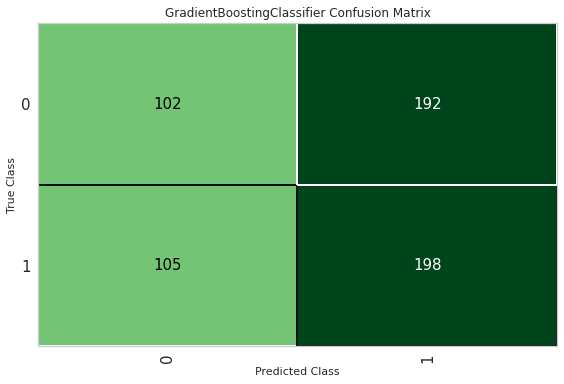

In [23]:
plot_model(MODEL, plot = 'confusion_matrix')

In [24]:
TUNED_MODEL = tune_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5500,0.5699,0.6111,0.5570,0.5828,0.0967,0.0972
1,0.5180,0.5255,0.5634,0.5263,0.5442,0.0340,0.0341
2,0.4892,0.4621,0.4507,0.5000,0.4741,-0.0198,-0.0199
3,0.5683,0.5632,0.5775,0.5775,0.5775,0.1363,0.1363
4,0.4676,0.4408,0.5070,0.4800,0.4932,-0.0666,-0.0667
5,0.5683,0.5704,0.6620,0.5663,0.6104,0.1331,0.1351
6,0.4748,0.5153,0.5417,0.4937,0.5166,-0.0555,-0.0558
7,0.6187,0.6269,0.6528,0.6267,0.6395,0.2352,0.2355
8,0.5036,0.5205,0.5000,0.5217,0.5106,0.0075,0.0075
9,0.4892,0.5048,0.4306,0.5082,0.4662,-0.0171,-0.0173


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


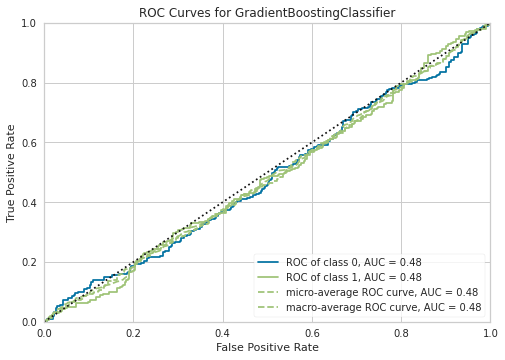

In [25]:
plot_model(TUNED_MODEL, plot = 'auc')

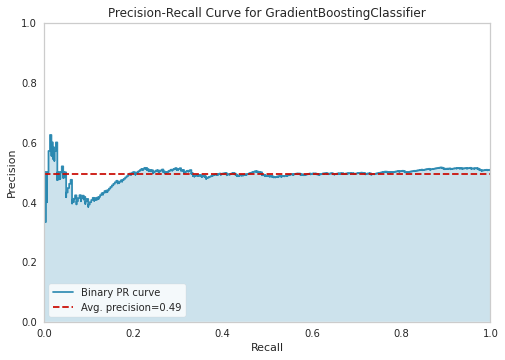

In [26]:
plot_model(TUNED_MODEL, plot = 'pr')

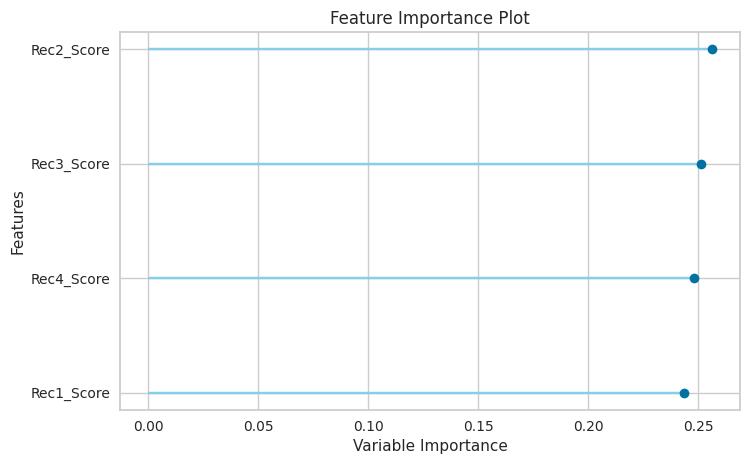

In [27]:
plot_model(TUNED_MODEL, plot='feature')

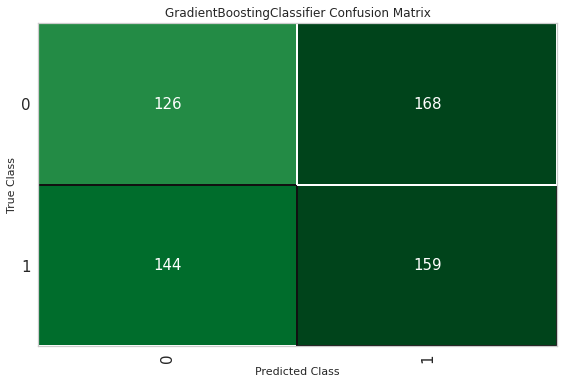

In [28]:
plot_model(TUNED_MODEL, plot = 'confusion_matrix')

In [29]:
predict_model(TUNED_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.4774,0.4812,0.5248,0.4862,0.5048,-0.0467,-0.0469


In [30]:
FINAL_MODEL = finalize_model(TUNED_MODEL)

In [31]:
print(FINAL_MODEL)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=230,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [32]:
predict_model(FINAL_MODEL);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [33]:
unseen_predictions = predict_model(FINAL_MODEL, data=data_unseen)
unseen_predictions.head()

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score,Label,Score
0,1,88.30,87.54,24.48,25.69,1,0.9875
1,1,-83.52,89.51,85.42,-76.54,1,0.9648
2,0,-65.49,54.42,-8.91,-2.31,1,0.9143
3,1,-67.72,-59.32,-77.89,23.02,1,0.7676
4,1,-8.43,-0.83,0.58,88.80,1,0.9510


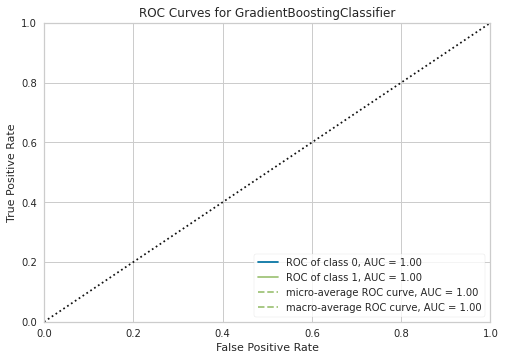

In [34]:
plot_model(FINAL_MODEL, plot = 'auc')

In [35]:
pkl_name = (today + "_" + model + "_" + pair)

In [36]:
save_model(FINAL_MODEL, pkl_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Current_Market',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=7, max_features=1.0,
                                             max_leaf_nodes=None,
           

In [37]:
SAVED_FINAL_MODEL = load_model(pkl_name)

Transformation Pipeline and Model Successfully Loaded


In [38]:
new_prediction = predict_model(SAVED_FINAL_MODEL, data=data_unseen)

In [39]:
data_unseen.shape

(852, 5)

In [40]:
new_prediction.head(20)

,Current_Market,Rec1_Score,Rec2_Score,Rec3_Score,Rec4_Score,Label,Score
0,1,88.30,87.54,24.48,25.69,1,0.9875
1,1,-83.52,89.51,85.42,-76.54,1,0.9648
2,0,-65.49,54.42,-8.91,-2.31,1,0.9143
3,1,-67.72,-59.32,-77.89,23.02,1,0.7676
4,1,-8.43,-0.83,0.58,88.80,1,0.9510
5,1,-16.60,85.60,12.14,3.20,1,0.8475
6,0,-85.83,-71.26,59.95,-0.14,0,0.9583
7,0,26.07,3.74,-56.90,-59.20,1,0.7625
8,0,-37.28,-74.04,-80.78,5.12,0,0.9621
9,0,92.71,-78.26,-92.84,5.03,0,0.8909


In [41]:
file = open(today + "_" + model + "_binary_classification_log_" + pair + ".txt", "w")
file.write ("Date: " + today + "\n" + \
            "Currency Pair: " + pair + "\n" + \
            "Model: " + model + "\n" + \
            "Frac: " + str(frac) + "\n" + \
            "Random State: " + str(random_state) + "\n" )
file.close()

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forex

/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/mladmin/Data/Forexience/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
